# Cover time of a graph

## Libraries

In [2]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Single Random Walk

INPUT:
* graph $G = (V, E)$
* number of simulations for every single random walk

OUTPUT:
* cover time: $T_{cov}(G) = \max_{v \in V} E(T_v)$

Where $E(T_v) \approx \frac{1}{M} \sum_{j=1}^{M} T_v[j]$

In [3]:
def random_walk_cover_time(G, num_trials=100):

    def single_random_walk(start_vertex):
        visited = set()
        current_vertex = start_vertex
        steps = 0
        
        while len(visited) < len(G.nodes):
            visited.add(current_vertex)
            neighbors = list(G.neighbors(current_vertex))
            current_vertex = random.choice(neighbors)
            steps += 1

        # Check if all nodes are visited
        assert visited == set(G.nodes), f"Not all nodes are visited: {visited}"
        
        return steps
    
    cover_times = defaultdict(list)
    
    for start_vertex in G.nodes:
        for _ in range(num_trials):
            steps = single_random_walk(start_vertex)
            cover_times[start_vertex].append(steps)
    
    max_expected_cover_time = max(sum(times) / len(times) for times in cover_times.values())
    return max_expected_cover_time

## Parallel Random Walks

INPUT:
* $G = (V, E)$
* $k$ number of random walks
* number of simulations

OUTPUT:
* cover time: $T_{cov}^k(G) = \max_{v \in V} E(T_{v}^k)$

Where $E(T_{v}^k) \approx \frac{1}{M} \sum_{j=1}^{M} T_v^k[j]$

In [4]:
def parallel_random_walk_cover_time(G, k, num_trials=100):
   
    def single_parallel_random_walk(start_vertex, k):
        visited = set()
        positions = [start_vertex] * k  # Inizializza tutte le camminate al vertice di partenza
        steps = 0
        
        while len(visited) < len(G.nodes):
            for i in range(k):
                neighbors = list(G.neighbors(positions[i]))
                positions[i] = random.choice(neighbors)
                visited.add(positions[i])
            steps += 1
        
        # Verifica se tutti i nodi sono stati visitati
        assert visited == set(G.nodes), f"Non tutti i nodi sono stati visitati: {visited}"
        
        return steps
    
    cover_times = defaultdict(list)
    
    for start_vertex in G.nodes:
        for _ in range(num_trials):
            steps = single_parallel_random_walk(start_vertex, k)
            cover_times[start_vertex].append(steps)
    
    max_expected_cover_time = max(sum(times) / len(times) for times in cover_times.values())
    return max_expected_cover_time

## Simple Example

Creation and visualisation of the complete graph

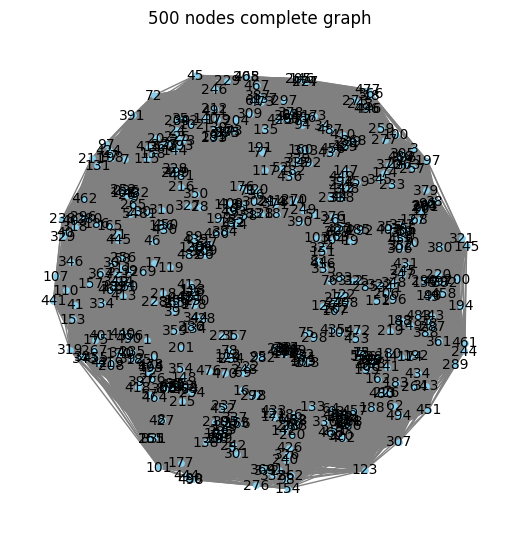

In [36]:
G = nx.complete_graph(500)

plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=15, font_size=10, font_color='black', edge_color='gray')
plt.title("500 nodes complete graph")
plt.show()

Print the results of simple random walk and k parallel random walk

In [32]:
estimated_cover_time = random_walk_cover_time(G, num_trials=10)
print(f"Cover Time Simple Random Walk: {estimated_cover_time}")

results_dict = {}
for k in range(1, 20):
    results_dict[k] = parallel_random_walk_cover_time(G, k, num_trials=10)

df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['Cover Time'])
df.index.name = 'k'
print(f"Cover Time for k Random Walks:")
df

Cover Time Simple Random Walk: 4034.7
Cover Time for k Random Walks:


,Cover Time
k,
1,4075.5
2,2023.3
3,1363.6
4,1031.4
5,785.7
6,685.9
7,603.5
8,497.3
9,457.4


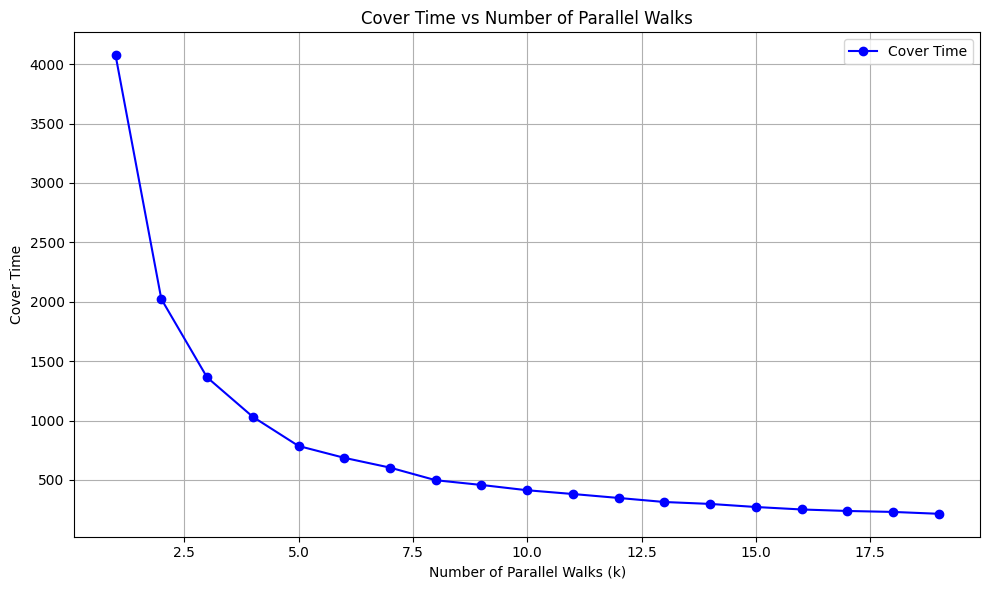

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Cover Time'], marker='o', linestyle='-', color='b', label='Cover Time')
plt.xlabel('Number of Parallel Walks (k)')
plt.ylabel('Cover Time')
plt.title('Cover Time vs Number of Parallel Walks')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## K Random Walks can cover a complete graph k times faster than a single Random Walk

For different graph size, we generate the cover times

In [9]:
n_values = [20 * alpha for alpha in range(1, 21)]
single_cover_times = []
parallel_cover_times = []

num_trials = 100

for n in n_values:
    G = nx.complete_graph(n)
    single_cover_time = random_walk_cover_time(G, num_trials)
    parallel_cover_time = parallel_random_walk_cover_time(G, n, num_trials)
    single_cover_times.append(single_cover_time)
    parallel_cover_times.append(parallel_cover_time)
    print(f"n={n}: Single cover time = {single_cover_time}, Parallel cover time = {parallel_cover_time}")


n=20: Single cover time = 71.51, Parallel cover time = 4.12
n=40: Single cover time = 175.95, Parallel cover time = 5.03
n=60: Single cover time = 290.18, Parallel cover time = 5.42
n=80: Single cover time = 412.96, Parallel cover time = 5.79
n=100: Single cover time = 540.98, Parallel cover time = 5.87
n=120: Single cover time = 682.47, Parallel cover time = 6.28
n=140: Single cover time = 810.72, Parallel cover time = 6.34
n=160: Single cover time = 970.45, Parallel cover time = 6.47
n=180: Single cover time = 1090.39, Parallel cover time = 6.53
n=200: Single cover time = 1259.11, Parallel cover time = 6.85
n=220: Single cover time = 1377.79, Parallel cover time = 6.83
n=240: Single cover time = 1558.91, Parallel cover time = 6.94
n=260: Single cover time = 1687.96, Parallel cover time = 6.99
n=280: Single cover time = 1843.67, Parallel cover time = 7.08
n=300: Single cover time = 1975.38, Parallel cover time = 7.15
n=320: Single cover time = 2157.18, Parallel cover time = 7.21
n=340

Select the correct value of the constant

In [7]:
c_single = np.mean([single_cover_time / (n * np.log(n)) for single_cover_time, n in zip(single_cover_times, n_values)])
c_parallel = np.mean([parallel_cover_time / np.log(n) for parallel_cover_time, n in zip(parallel_cover_times, n_values)])

Plot single and parallel cover time vs graph size

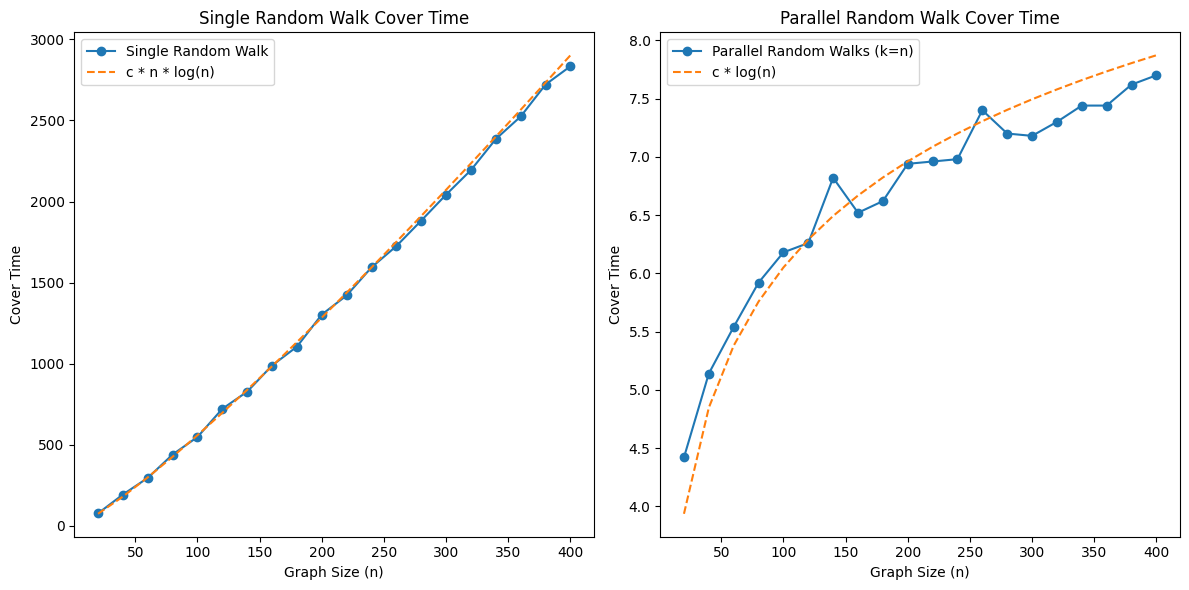

In [8]:
# Genera i grafici
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_values, single_cover_times, label="Single Random Walk", marker='o')
plt.plot(n_values, [c_single * n * np.log(n) for n in n_values], linestyle='--', label="c * n * log(n)")
plt.xlabel("Graph Size (n)")
plt.ylabel("Cover Time")
plt.title("Single Random Walk Cover Time")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_values, parallel_cover_times, label="Parallel Random Walks (k=n)", marker='o')
plt.plot(n_values, [c_parallel * np.log(n) for n in n_values], linestyle='--', label="c * log(n)")
plt.xlabel("Graph Size (n)")
plt.ylabel("Cover Time")
plt.title("Parallel Random Walk Cover Time")
plt.legend()

plt.tight_layout()
plt.show()